In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [10]:
dataset = pd.read_csv('train.csv')

In [35]:
testset = pd.read_csv('test.csv')

In [12]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
train_data = dataset.iloc[:, [2,4,5]]
test_data = testset.iloc[:, [1,3,4]]
test_data.head()

,Pclass,Sex,Age
0,3,male,34.5
1,3,female,47.0
2,2,male,62.0
3,3,male,27.0
4,3,female,22.0


In [14]:
train_data.head()

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0


In [15]:
Sex = pd.get_dummies(train_data['Sex'], drop_first=True)
train_data.drop(['Sex'], axis=1, inplace=True)
train_data = pd.concat([train_data, Sex], axis=1)
train_data.head()

,Pclass,Age,male
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1


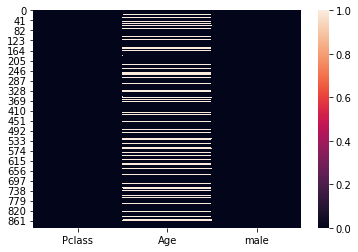

In [16]:
sns.heatmap(train_data.isnull())

In [19]:
train_data=(train_data.fillna(0)) 
y = dataset.iloc[:, 1]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [20]:
from sklearn.cross_validation import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.3)

/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [25]:
knn.fit(train_data, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
y_pred = knn.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8283582089552238


In [38]:
Sex = pd.get_dummies(test_data['Sex'], drop_first=True)
test_data.drop(['Sex'], axis=1, inplace=True)
test_data = pd.concat([test_data, Sex], axis=1)
test_data.head()


,Pclass,Age,male
0,3,34.5,1
1,3,47.0,0
2,2,62.0,1
3,3,27.0,1
4,3,22.0,0


In [51]:
test_data=test_data.fillna(0)
y_pred_test_data = knn.predict(test_data)


ValueError: could not convert string to float: 'Q'

In [ ]:
test_data1 = pd.read_csv('test.csv')

In [50]:
pd.DataFrame({'PassengerId':dataset.PassengerId, 'Survived':y_}).set_index('PassengerId').to_csv('Titanic_Submission_KNN.csv', float_format='%.f')

ValueError: array length 418 does not match index length 891